# Elliptical Orbit
## Given:
Earth and satellite as a two body system, $R_p = 3R_{Earth}$, $R_a = 15R_{Earth}$, $\theta^*_0 = 90^o$

## Find:
a) Orbital parameters $r_0$, $p$, $h$, $P$, $\epsilon$, $a$, $e$, $r_0$, $v_0$, $\gamma_0$, and $v_c$. How does the circular velocity compare to the velocity?

b) Compute distance and velocity in terms of radial and perifocal frame.

c) The new position is $\Delta \theta^* = \theta^*_1 - \theta^*_0 = 120$. What is $r_1$, $v_1$, $gamma_1$

d) Plot the positionsa and the orbit.

In [2]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt
from Functions.Universe import G

In [3]:
system = 'Earth'
rp = 3*SS.loc[system, 'r']
ra = 15*SS.loc[system, 'r']
thst0 = kp.thst.degree(90)
miu = SS.loc[system, 'miu']

del_thst = kp.angle.degree(120)

### Part a)

In [4]:
a = kp.a_rp_ra(rp, ra)
e = kp.e_rp_a(rp, a)
p = kp.p_a_e(a, e)
h = kp.h_miu_p(miu, p)
Eps = kp.Eps_miu_a(miu, a)

### Part b)

In [5]:
r0 = kp.distance.keplar_r(p, e, thst0.rad)
v0_mag = kp.velocity.v_a_miu_r(a, miu, r0.mag)
gamma0 = kp.gamma.gamma_h_r_v_thst(h, r0.mag, v0_mag, thst0.rad)
v0 = kp.velocity.v_gamma(v0_mag, gamma0.rad, thst0.rad)

print('Velocity (km/s)')
print(v0.print_table())

print('\nDistance (km)')
print(r0.print_table())

print('\n Flight path angle (deg): ', round(gamma0.deg,3))

Velocity (km/s)
        per       rad       mag
0 -3.535387  2.356925  4.249007
1  2.356925  3.535387  4.249007
2  0.000000  0.000000  4.249007

Distance (km)
            per       rad       mag
0  1.952741e-12  31890.68  31890.68
1  3.189068e+04      0.00  31890.68
2  0.000000e+00      0.00  31890.68

 Flight path angle (deg):  33.69


### Part c)

In [6]:
thst1 = kp.angle.radians(del_thst.rad + thst0.rad)

r1 = kp.distance.keplar_r(p, e, thst1.rad)
v1_mag = kp.velocity.v_a_miu_r(a, miu, r1.mag)
gamma1 = kp.gamma.gamma_h_r_v_thst(h, r1.mag, v1_mag, thst1.rad)
v1 = kp.velocity.v_gamma(v1_mag, gamma1.rad, thst1.rad)

print('Velocity (km/s)')
print(v1.print_table())

print('\nDistance (km)')
print(r1.print_table())

print('\n Flight path angle (deg): ', round(gamma1.deg,3))

Velocity (km/s)
        per       rad       mag
0  1.767694 -1.178462  1.903024
1 -0.704810  1.494230  1.903024
2  0.000000  0.000000  1.903024

Distance (km)
            per           rad           mag
0 -65345.218536  75454.159024  75454.159024
1 -37727.079512      0.000000  75454.159024
2      0.000000      0.000000  75454.159024

 Flight path angle (deg):  -38.262


### Part d)

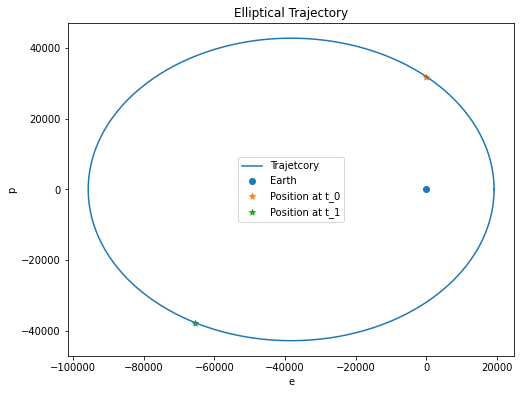

In [7]:
thst = kp.thst.degree(np.linspace(0, 360, 500))
r = kp.distance.keplar_r(p, e, thst.rad)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(r.per[:,0], r.per[:,1], label='Trajetcory')
ax.scatter(0, 0, label='Earth')
ax.scatter(r0.per[0], r0.per[1], label='Position at t_0', marker='*')
ax.scatter(r1.per[0], r1.per[1], label='Position at t_1', marker='*')
ax.set_aspect('equal', 'box')
ax.set_xlabel('e')
ax.set_ylabel('p')
ax.set_title('Elliptical Trajectory')
ax.legend()